# Ailie Kwak

## Research question/interests

**Research Question: Overall, healthy mind dimension helps to maintain low-stress level? If so, which factors of the healthy mind dimension are related to low-stress levels?**

Stress level is affected by many different factors, I assume that factors related to a healthy mind would impact stress level the most. Also, people who are having a healthy mind, a good emotional, psychological, and social well-being, would have a low-stress levels. Among the different factors in the healthy mind dimension, I am wondering which factors would contribute the most to the low-stress level. 

### Analysis Plan

1. I will subset the factors (FLOW, DAILY_SHOUTING, WEEKLY MEDITATION, and DAILY_STRESS) that I am interested in from the whole dataset.
2. I would like to remove missing values (NA) that might negatively impact on the result.
3. I will consider outliers in the dataset in the next analysis.
4. I will create a new column, combine all 3 factors and see if healthy mind factors, together, helps to maintain low-stress level
5. I would investigate the correlation of each factor with stress levels. I would visualise each correlation using a scatter plot to show the correlation and relative information such as the error bar and line of best fit.
6. Then I would compare the correlation value to find a factor that impacts low-stress levels the most. 
7. I plan to compare the correlation of each factor by visualising it in one plot since all three measures are in the same unit (0 - 10 times).
8. I would use 100% stacked bar, Diverging bars instead of simple bar graph side by side to visualise the data.

<br> Version:
* This section has been updated for Milestone 3, Task 2. (Mar. 4, 2023)

## Loading Data

In [ ]:
# importing Pandas package to load a data file to notebook
import pandas as pd

In [ ]:
# Loading data by using read_csv() function
data = pd.read_csv("../data/raw/Wellbeing_and_lifestyle_data_Kaggle.csv")
data

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3/14/21 5:42,3,3,0,4,0,10,0,4,2,...,7,0,1,1,5,2,5,51 or more,Female,644.5
15968,3/14/21 6:30,3,3,6,8,7,4,6,3,1,...,6,0,0,2,10,5,8,21 to 35,Female,714.9
15969,3/14/21 8:35,4,3,0,10,10,8,6,5,1,...,7,0,1,2,10,1,10,21 to 35,Male,716.6
15970,3/14/21 8:43,1,1,10,8,2,7,3,2,1,...,8,7,2,2,1,6,8,21 to 35,Female,682.0


# Milestone 3

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/raw/Wellbeing_and_lifestyle_data_Kaggle.csv")
data

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3/14/21 5:42,3,3,0,4,0,10,0,4,2,...,7,0,1,1,5,2,5,51 or more,Female,644.5
15968,3/14/21 6:30,3,3,6,8,7,4,6,3,1,...,6,0,0,2,10,5,8,21 to 35,Female,714.9
15969,3/14/21 8:35,4,3,0,10,10,8,6,5,1,...,7,0,1,2,10,1,10,21 to 35,Male,716.6
15970,3/14/21 8:43,1,1,10,8,2,7,3,2,1,...,8,7,2,2,1,6,8,21 to 35,Female,682.0


In [3]:
# It allows to see how many rows and columns in dataset
data.shape #(rows, columns)

(15972, 24)

In [4]:
data.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [5]:
data.columns

Index(['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
FRUITS_VEGGIES,15972.0,2.922677,1.442694,0.0,2.0,3.0,4.0,5.0
PLACES_VISITED,15972.0,5.232970,3.311912,0.0,2.0,5.0,8.0,10.0
CORE_CIRCLE,15972.0,5.508077,2.840334,0.0,3.0,5.0,8.0,10.0
SUPPORTING_OTHERS,15972.0,5.616454,3.242021,0.0,3.0,5.0,10.0,10.0
SOCIAL_NETWORK,15972.0,6.474267,3.086672,0.0,4.0,6.0,10.0,10.0
ACHIEVEMENT,15972.0,4.000751,2.755837,0.0,2.0,3.0,6.0,10.0
DONATION,15972.0,2.715314,1.851586,0.0,1.0,3.0,5.0,5.0
BMI_RANGE,15972.0,1.410656,0.491968,1.0,1.0,1.0,2.0,2.0
TODO_COMPLETED,15972.0,5.745993,2.624097,0.0,4.0,6.0,8.0,10.0
FLOW,15972.0,3.194778,2.357518,0.0,1.0,3.0,5.0,10.0


In [7]:
data.describe(exclude = "number").T

,count,unique,top,freq
Timestamp,15972,7002,7/23/18,162
DAILY_STRESS,15972,7,3,4398
AGE,15972,4,21 to 35,6108
GENDER,15972,2,Female,9858


### Initial Thoughts
* Most of the columns are in numeric veriables.
* Only 4 columns are in non-numeric veriables.
* 'DAILY_STRESS' column seems like to contain numberic variables but it is not. For correlation analysis, I will change the type to numeric.

#### Explore the Dataset

In [8]:
data.DAILY_STRESS.unique()

array(['2', '3', '1', '4', '5', '0', '1/1/00'], dtype=object)

In [9]:
# Subsetted columns that I want to explore.
data_cleaned = data.drop(['Timestamp', 'FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 
                          'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'DAILY_STEPS',
                          'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 
                          'TIME_FOR_PASSION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE'], axis = "columns")
data_cleaned

,DAILY_STRESS,FLOW,DAILY_SHOUTING,WEEKLY_MEDITATION
0,2,4,5,5
1,3,2,2,6
2,3,2,2,3
3,3,5,5,0
4,1,0,0,5
...,...,...,...,...
15967,3,2,1,5
15968,3,5,0,8
15969,3,3,1,10
15970,1,10,2,8


In [10]:
data_cleaned = data_cleaned.dropna()
data_cleaned

,DAILY_STRESS,FLOW,DAILY_SHOUTING,WEEKLY_MEDITATION
0,2,4,5,5
1,3,2,2,6
2,3,2,2,3
3,3,5,5,0
4,1,0,0,5
...,...,...,...,...
15967,3,2,1,5
15968,3,5,0,8
15969,3,3,1,10
15970,1,10,2,8


##### Observations:
* There is no missing value.

In [11]:
# Dropped a row which contain invalid format value - '1/1/00'.
not_stress_levels = ['1/1/00']
data_cleaned = data_cleaned[data_cleaned.DAILY_STRESS.isin(not_stress_levels) == False]
data_cleaned['DAILY_STRESS'].unique()

array(['2', '3', '1', '4', '5', '0'], dtype=object)

In [12]:
# Reset the index and dropped old index column.
data_cleaned = data_cleaned.reset_index()
data_cleaned = data_cleaned.drop(['index'], axis = 'columns')
data_cleaned

,DAILY_STRESS,FLOW,DAILY_SHOUTING,WEEKLY_MEDITATION
0,2,4,5,5
1,3,2,2,6
2,3,2,2,3
3,3,5,5,0
4,1,0,0,5
...,...,...,...,...
15966,3,2,1,5
15967,3,5,0,8
15968,3,3,1,10
15969,1,10,2,8


#### Visualisation

<AxesSubplot:xlabel='DAILY_SHOUTING', ylabel='DAILY_STRESS'>

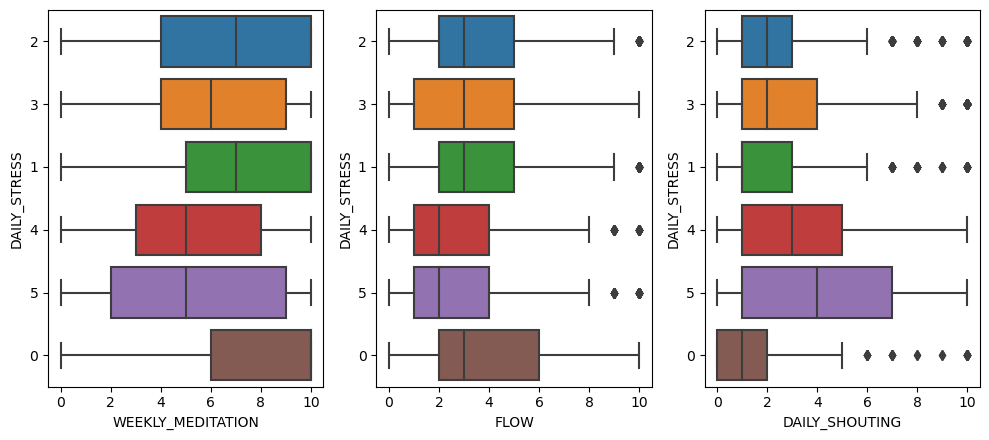

In [13]:
# Creat Box plot to explore distribution and outliers of each catetory.
plt.rcParams["figure.figsize"] = [10.00, 4.50]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 3)
sns.boxplot(data = data_cleaned, x = "WEEKLY_MEDITATION", y = "DAILY_STRESS", ax=axes[0])
sns.boxplot(data = data_cleaned, x = "FLOW", y = "DAILY_STRESS", ax=axes[1])
sns.boxplot(data = data_cleaned, x = "DAILY_SHOUTING", y = "DAILY_STRESS", ax=axes[2])

##### Observations:
* There is no outliers in WEEKLY MEDITATION column.
* There is few ourliers in FLOW and DAILY SHOUTING columns. 
* In WEEKLY MEDITATION column, DAILY STRESS 0 has widest variation among the values.
* In DAILY SHOUTING column, DAILY STRESS 5 has widest variation among the values.

<AxesSubplot:xlabel='DAILY_SHOUTING', ylabel='DAILY_STRESS'>

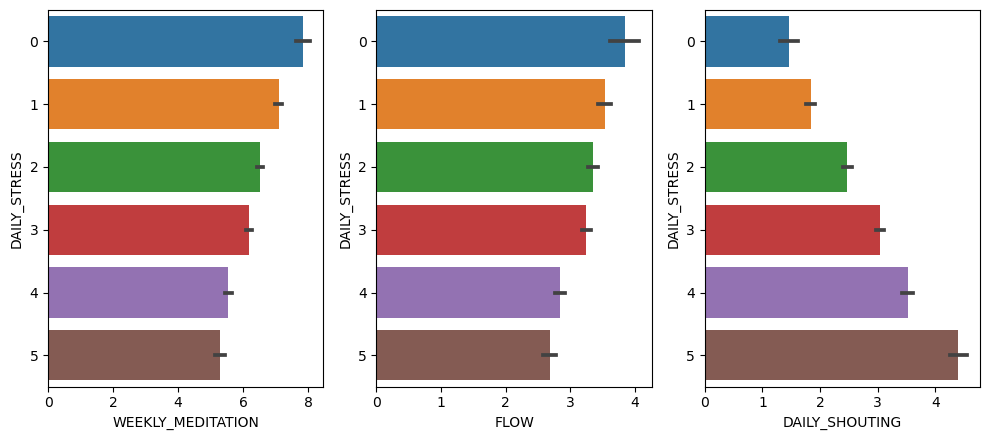

In [14]:
# Create bar graph to see average IVs in each DV value (0, 1, 2, 3, 4, 5)
plt.rcParams["figure.figsize"] = [10.00, 4.50]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 3)
sns.barplot(data = data_cleaned, x = "WEEKLY_MEDITATION", y = "DAILY_STRESS", order = ['0', '1', '2', '3', '4', '5'], ax=axes[0])
sns.barplot(data = data_cleaned, x = "FLOW", y = "DAILY_STRESS", order = ['0', '1', '2', '3', '4', '5'], ax=axes[1])
sns.barplot(data = data_cleaned, x = "DAILY_SHOUTING", y = "DAILY_STRESS", order = ['0', '1', '2', '3', '4', '5'], ax=axes[2])

##### Observations:
* Lower stress levels have higher mean of amount of weekly meditation
* Lower stress levels have higher mean of Flow state
* Lower stress levels have lower mean of amount of Daily shouting
* All independent variables, WEEKLY MEDITATION, FLOW, and DAILY SHOUTING has a relationsihp with DAILY STRESS as more healthy mind related with lower daily stress.

Since it is unable to create scatter plot with the value collected from likert scale, I instead show heat map to visualise the correlation between DV ('Daily stress') and IVs (flow, daily shouting, weekly meditation)

In [15]:
data_cleaned_n = data_cleaned
data_cleaned_n['DAILY_STRESS'] = pd.to_numeric(data_cleaned_n['DAILY_STRESS'])

<AxesSubplot:>

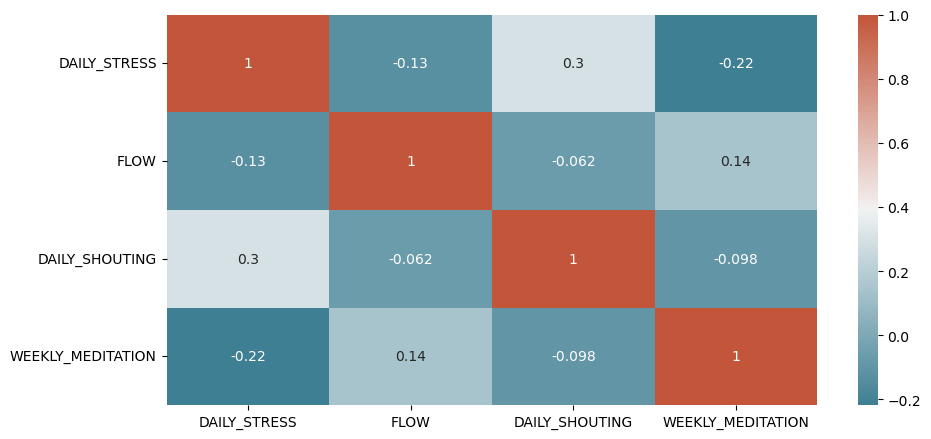

In [16]:
corr = data_cleaned_n.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

##### Observations:
* DAILY STRESS and FLOW are negatively correlated. It means that lower stress level has higher flow state.
* DAILY STRESS and WEEKLY MEDITATION are negatively correlated. It means that lower stress level has higher amount of doing weekly meditation.
* DAILY STRESS AND DAILY SHOUTING is positively correlated. It means that lower stress level has lower amount of shouting in a day.